In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
#Connect to database

import mysql.connector
import time
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="password",
  database="valorant_tracker"
)
cursor = mydb.cursor() 

In [3]:
df = pd.read_sql("SELECT * FROM stats", mydb)
print("Number of samples: " + str(df.shape[0]))

Number of samples: 1486070


In [4]:
df['user_id'] = df['match_player_id'].str[36:]


In [5]:
print(df.columns)

Index(['match_player_id', 'rounds', 'date', 'result', 'map', 'smurf', 'agent',
       'kills', 'headshots', 'deaths', 'assists', 'damage', 'damage_received',
       'econ_rating', 'plants', 'defuses', 'first_bloods', 'grenade_casts',
       'ability_2_casts', 'ability_1_casts', 'ultimate_casts', 'placement',
       'kdratio', 'headshot_percentage', 'first_deaths', 'last_deaths',
       'current_rank', 'user_id'],
      dtype='object')


In [35]:
import matplotlib.pyplot as plt

data = df.drop(["match_player_id", 
"user_id", 
"date", 
"rounds", 
"map", 
"result", 
"agent",
"smurf",
"current_rank",], axis=1)

#Should eventually take into account ability casts for each agent
data = data.drop(["grenade_casts",
"ability_2_casts",
"ability_1_casts",
"ultimate_casts"
], axis=1)


kills


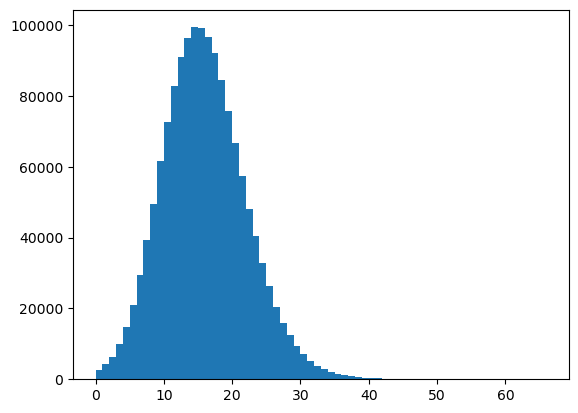

headshots


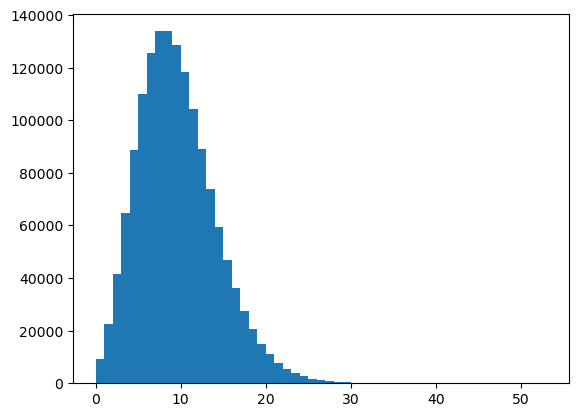

deaths


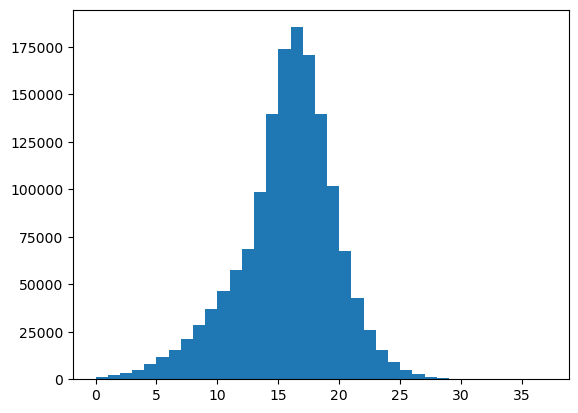

assists


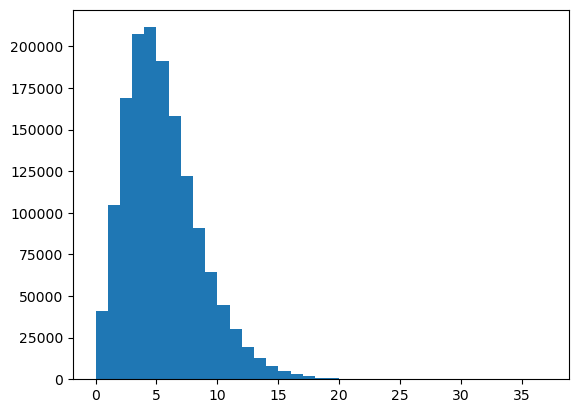

damage


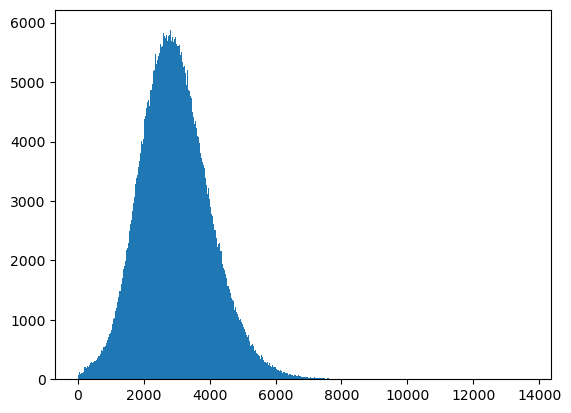

damage_received


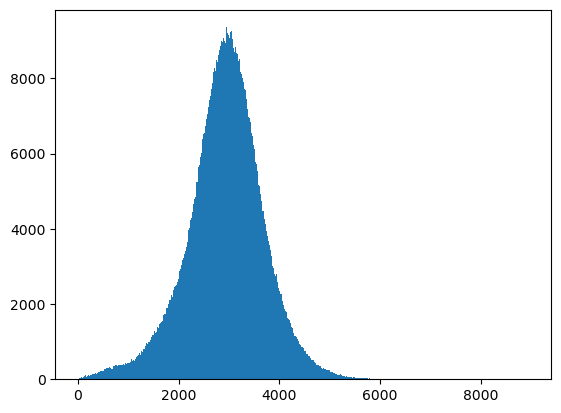

econ_rating


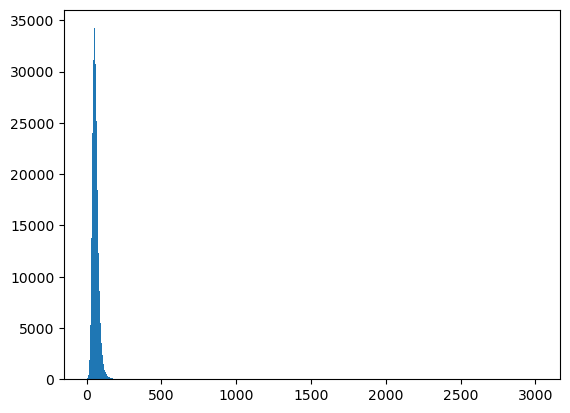

plants


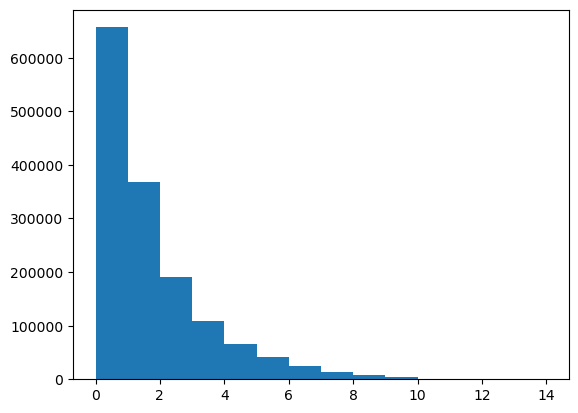

defuses


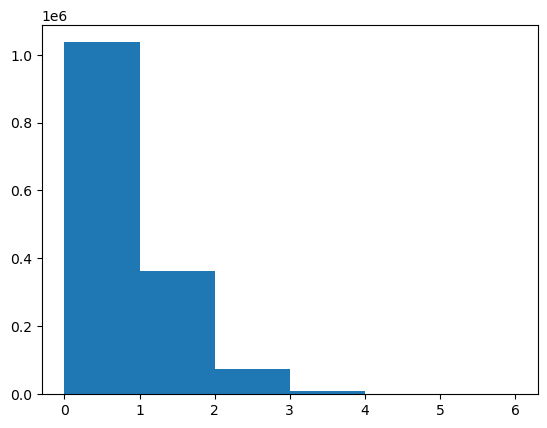

first_bloods


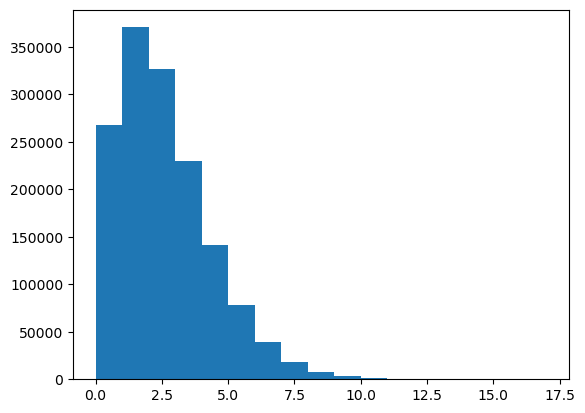

placement


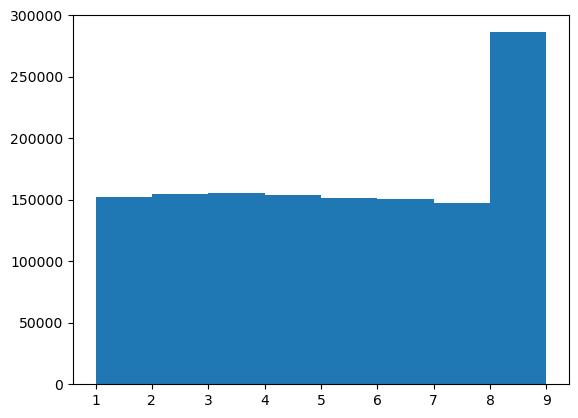

kdratio


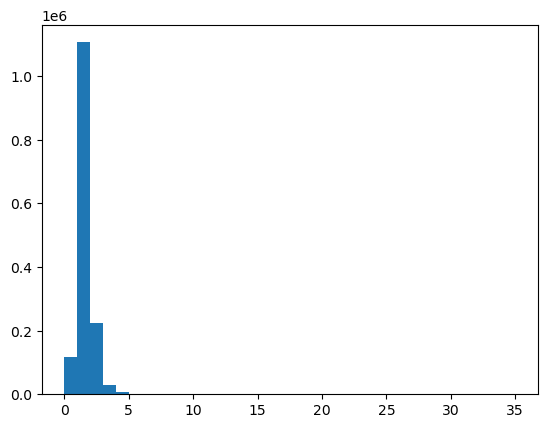

headshot_percentage


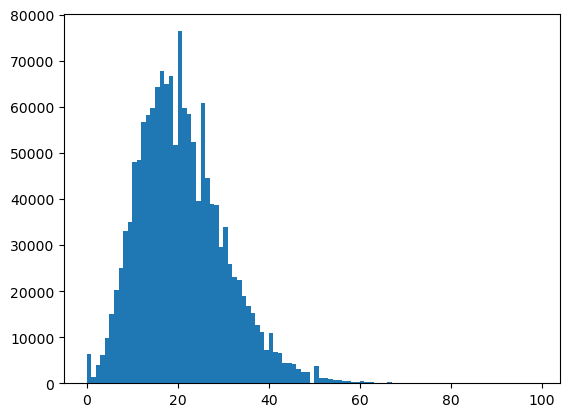

first_deaths


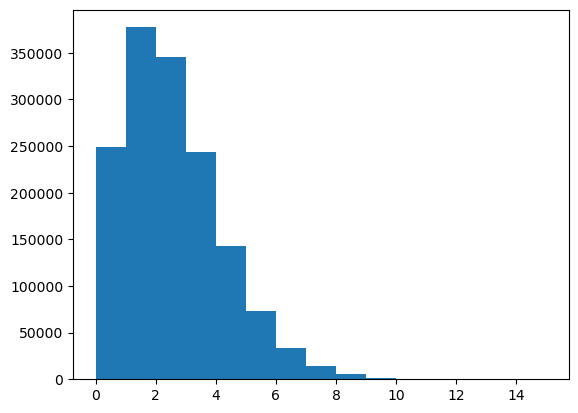

last_deaths


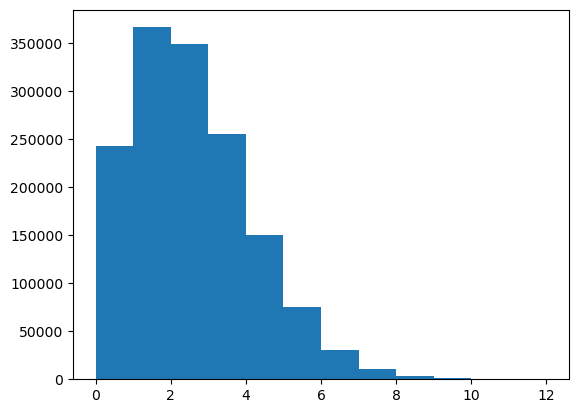

In [38]:
for col in data:
    print(col)
    bin_size = 10 if col == "damage" or col == "damage_received" else 1
    plt.hist(data[col], bins=np.arange(df[col].min(), df[col].max(), bin_size))
    plt.show()

(array([242788., 971837., 270315.,   1130.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <BarContainer object of 12 artists>)

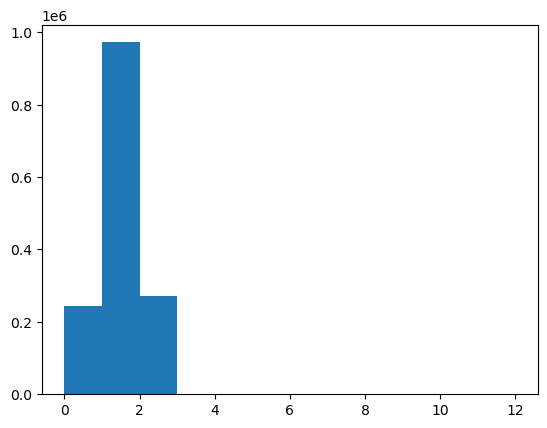

In [45]:

plt.hist(data["last_deaths"] ** 0.5, bins=np.arange(df["last_deaths"].min(), df["last_deaths"].max(), 1))

In [ ]:

plt.hist(data["first_deaths"] ** 0.5, bins=np.arange(df[col].min(), df[col].max(), 1))